In [ ]:
!pip install graphviz

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
from matplotlib.pyplot import imshow
import tensorflow as tf
import pydot
import graphviz

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from keras import layers
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model
from keras.utils.vis_utils import plot_model

import keras.backend as K
from keras.models import Sequential
import os
print(os.listdir("../input"))

os.environ["CUDA_VISIBLE_DEVICES"] = '0'
# Any results you write to the current directory are saved as output.

In [ ]:
df = pd.read_csv("../input/train.csv")
df.head()

In [ ]:
def prepimages(data, m, dataset):
    print("Preparing images")
    X_train = np.zeros((m, 100, 100, 3))
    count = 0
    
    for fig in data['Image']:
        #load images into images of size 100x100x3
        img = image.load_img("../input/"+dataset+"/"+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)

        X_train[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    
    return X_train

In [ ]:
def prep_labels(y):
    values = np.array(y)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    # print(integer_encoded)

    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    # print(onehot_encoded)

    y = onehot_encoded
    # print(y.shape)
    return y, label_encoder

In [ ]:
X = prepimages(df, df.shape[0], "train")
X /= 255

In [ ]:
y, label_encoder = prep_labels(df['Id'])
y.shape

In [ ]:
model = Sequential()

model.add(Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0', input_shape = (100, 100, 3)))

model.add(BatchNormalization(axis = 3, name = 'bn0'))
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2), name='max_pool'))
model.add(Conv2D(64, (3, 3), strides = (1,1), name="conv1"))
model.add(Activation('relu'))
model.add(MaxPooling2D((3, 3), name='max_pool2'))

model.add(Flatten())
model.add(Dense(500, activation="relu", name='rl'))
model.add(Dropout(0.7))
model.add(Dense(y.shape[1], activation='softmax', name='sm'))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
plot_model(model, to_file='/kaggle/working/model.png')


In [ ]:
history = model.fit(X, y, epochs=50,validation_split=0.2, batch_size=64, verbose=1)

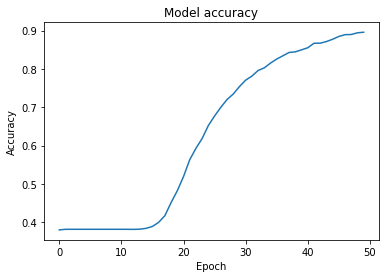

In [24]:
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
df_test=pd.read_csv("../input/sample_submission.csv")
df_test.head()

In [ ]:
X = prepimages(df_test, df_test.shape[0], "test")
X /= 255

In [23]:
predictions = model.predict(np.array(X), verbose=1)
predictions

7960/7960 [==============================] - 2s 219us/step


array([[0.00019954, 0.0001894 , 0.0001995 , ..., 0.00020718, 0.00021842,
        0.00020862],
       [0.0001935 , 0.00018184, 0.00019985, ..., 0.00020189, 0.0002203 ,
        0.00021093],
       [0.00019985, 0.00019119, 0.00019474, ..., 0.00020737, 0.0002152 ,
        0.00021108],
       ...,
       [0.00020035, 0.00018614, 0.00020132, ..., 0.000206  , 0.0002125 ,
        0.00021176],
       [0.00020104, 0.00019335, 0.00019749, ..., 0.00019941, 0.00021346,
        0.00021214],
       [0.00019809, 0.00019361, 0.00019651, ..., 0.00020089, 0.00022183,
        0.00021352]], dtype=float32)